# Import Library

In [1]:
# Pustaka untuk mengolah dan visualisasi data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Pustaka keperluan model
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Mengabaikan peringatan
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/elvinojunior/dicoding_ML_terapan1/refs/heads/main/Klasifikasi%20Kemiskinan%20di%20Indonesia.csv', sep=";")
df

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98",7148,"66,41","5,71",0
1,ACEH,Aceh Singkil,"20,36",8776,"69,22","8,36",1
2,ACEH,Aceh Selatan,"13,18",8180,"67,44","6,46",0
3,ACEH,Aceh Tenggara,"13,41",8030,"69,44","6,43",0
4,ACEH,Aceh Timur,"14,45",8577,"67,83","7,13",0
...,...,...,...,...,...,...,...
509,PAPUA,Puncak,"36,26",5412,"43,17","0,94",1
510,PAPUA,Dogiyai,"28,81",5415,55,"5,68",1
511,PAPUA,Intan Jaya,"41,66",5328,"48,34","1,43",1
512,PAPUA,Deiyai,"40,59",4673,"49,96","0,79",1


# EDA (Exploratory Data Analysis)

In [3]:
# Ringkasan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Provinsi                                                         514 non-null    object
 1   Kab/Kota                                                         514 non-null    object
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  514 non-null    object
 3   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)     514 non-null    int64 
 4   Indeks Pembangunan Manusia                                       514 non-null    object
 5   Tingkat Pengangguran Terbuka                                     514 non-null    object
 6   Klasifikasi Kemiskinan                                           514 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 28.2+ KB


Ringkasan Dataframe :
* Memiliki 7 kolom dengan 514 baris data
* Beberapa kolom memiliki tipe data yang belum sesuai yaitu kolom : Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen), Indeks Pembangunan Manusia, dan Tingkat Pengangguran Terbuka

In [4]:
# Mengganti nama kolom agar lebih mudah untuk melakukan EDA
df = df.rename(columns={
    'Provinsi': 'provinsi',
    'Kab/Kota': 'kab/kota',
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'persen_kemiskinan_kota',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'pengeluaran_kapita(ribu/tahun)',
    'Indeks Pembangunan Manusia': 'IPM',
    'Tingkat Pengangguran Terbuka': 'tingkat_pengangguran',
    'Klasifikasi Kemiskinan': 'klasifikasi_kemiskinan'
    })

Untuk Memudahkan dalam melakukan Data cleaning dan EDA saya mengganti beberapa nama kolom agar jadi lebih ringkas

In [5]:
# Mengubah tipe data object menjadi float
df['persen_kemiskinan_kota'] = df['persen_kemiskinan_kota'].str.replace(',', '.').astype(float)
df['IPM'] = df['IPM'].str.replace(',', '.').astype(float)
df['tingkat_pengangguran'] = df['tingkat_pengangguran'].str.replace(',', '.').astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   provinsi                        514 non-null    object 
 1   kab/kota                        514 non-null    object 
 2   persen_kemiskinan_kota          514 non-null    float64
 3   pengeluaran_kapita(ribu/tahun)  514 non-null    int64  
 4   IPM                             514 non-null    float64
 5   tingkat_pengangguran            514 non-null    float64
 6   klasifikasi_kemiskinan          514 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 28.2+ KB


* Nama kolom sudah berubah menjadi lebih ringkas
* Tipe data sudah diubah menjadi lebih sesuai

## Data Cleaning

In [6]:
# Cek missing values
df.isna().sum()

,0
provinsi,0
kab/kota,0
persen_kemiskinan_kota,0
pengeluaran_kapita(ribu/tahun),0
IPM,0
tingkat_pengangguran,0
klasifikasi_kemiskinan,0


In [7]:
# Cek duplicated values
print(f"duplicated values : {df.duplicated().sum()}")

duplicated values : 0


In [8]:
# # Menghapus missing values dan duplicated values
# df.dropna(inplace=True)
# df.drop_duplicates(inplace=True)

# # Melihat hasil setelah menghapus
# df.info()

Berdasarkan pengecekan missing values dan duplicated values tidak terlihat adanya missing values dan duplicated values jadi tidak perlu penanganan lebih lanjut. mari kita lanjut ke tahap pengecekan outlier

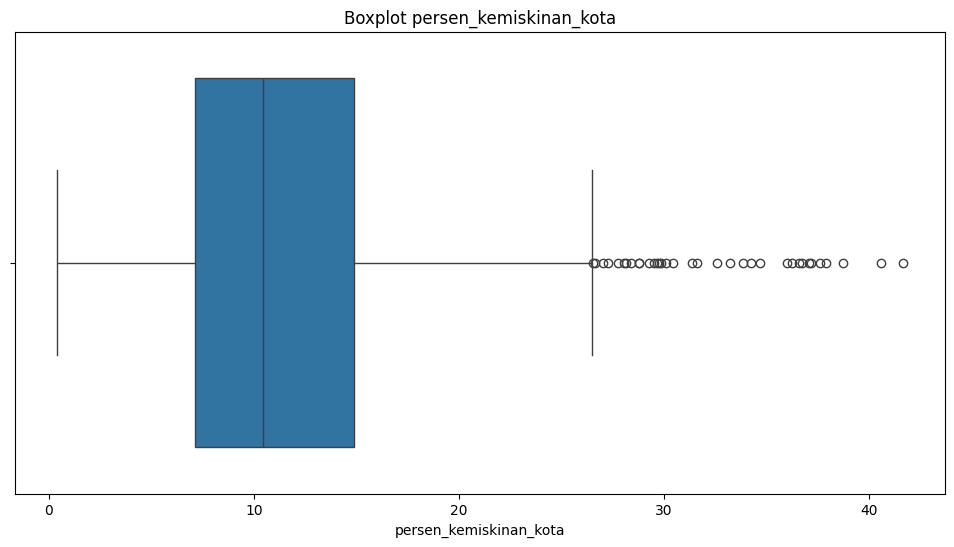

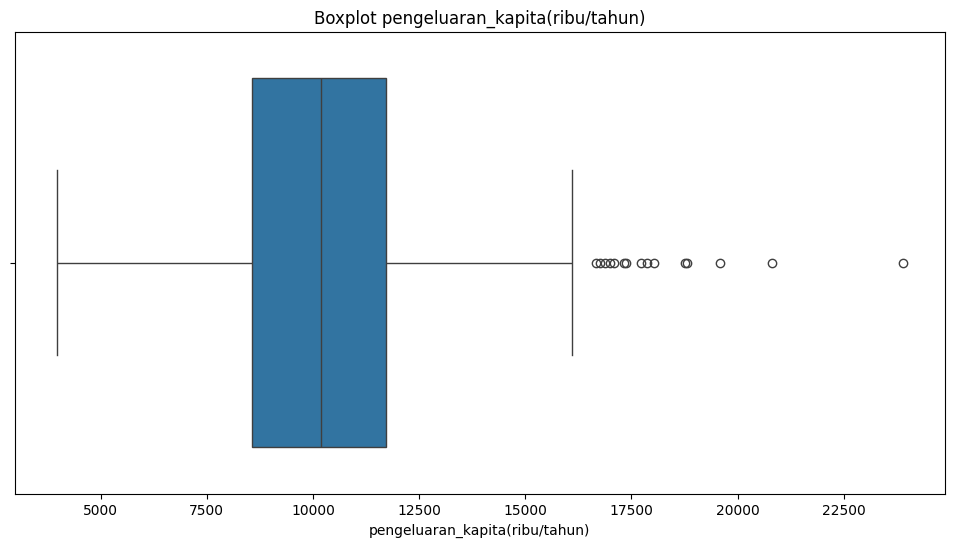

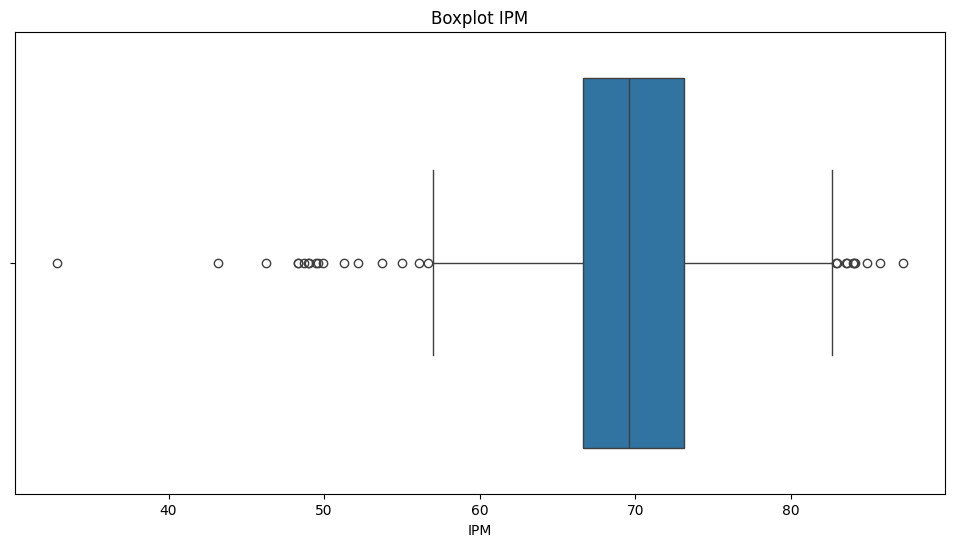

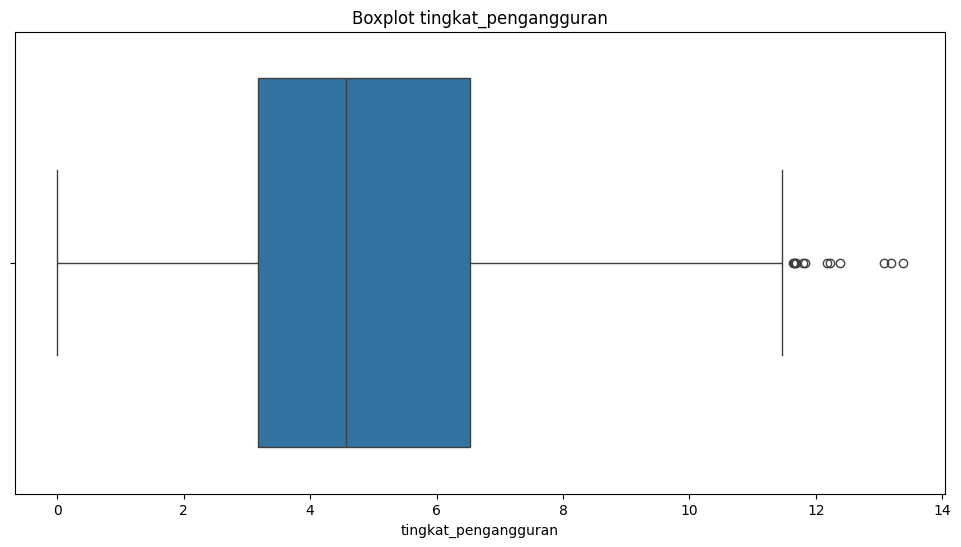

In [9]:
# Cek Outliers pada fitur numerik
outlier = df.drop(columns=['provinsi', 'kab/kota', 'klasifikasi_kemiskinan'])

# Plot boxplot tiap kolom
for column in outlier:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=outlier[column])
    plt.title(f'Boxplot {column}')
    plt.show()

Berdasarkan Boxplot pada kolom numerik terdapat beberapa outlier yang perlu ditangani

In [10]:
# Menangani outliers menggunakan IQR Method
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1

df = df[~((outlier<(Q1-1.5*IQR))|(outlier>(Q3+1.5*IQR))).any(axis=1)]

Saya Menggunakan Metode IQR (Interquartile Range) yaitu teknik statistik yang digunakan untuk mengukur sebaran data dengan menghitung selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1). IQR membantu dalam mendeteksi outlier dengan menentukan batas bawah dan batas atas data yang dianggap normal.

Berikut langkah langkah nya :
1. Hitung Q1 dan Q3:

  Q1 dapat dihitung dengan menggunakan fungsi kuantil pada data.

  Q3 juga dihitung dengan cara yang sama.
2. Hitung IQR:

  IQR = Q3 - Q1.
3. Tentukan Batas Outlier:

  Batas bawah: Q1 - 1.5 * IQR.
  
  Batas atas: Q3 + 1.5 * IQR.

In [11]:
# Ukuran data setelah penanganan outlier
print(f"ukuran data : {df.shape}")

# Statistik deskriptif
df.describe()

ukuran data : (449, 7)


,persen_kemiskinan_kota,pengeluaran_kapita(ribu/tahun),IPM,tingkat_pengangguran,klasifikasi_kemiskinan
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,11.052006,10311.922049,70.342405,4.972494,0.064588
std,5.117489,2044.391634,4.454188,2.271246,0.246072
min,0.400694,5780.000000,58.700000,0.700000,0.000000
25%,7.170000,8850.000000,67.190000,3.320000,0.000000
50%,10.240000,10221.000000,69.660000,4.570000,0.000000
75%,14.040000,11608.000000,72.730000,6.270000,0.000000
max,26.500000,16095.000000,82.620000,11.320000,1.000000


Setelah melakukan Penanganan outlier dataset kita menjadi 449 baris data dan 7 kolom.

Untuk insight dari statistik deskriptif :
* Sebagian besar daerah punya angka kemiskinan di bawah 14%, tapi ada beberapa daerah dengan kemiskinan sangat tinggi sampai 26.5%.

* Pengeluaran kapita masyarakat sangat bervariasi antar daerah, dari 5.78 juta sampai 16 juta per tahun.

* IPM rata-rata daerah di Indonesia masih sekitar 70, dengan gap cukup besar antara daerah terendah (58.7) dan tertinggi (82.6).

* Tingkat pengangguran di beberapa daerah sampai 11%, menunjukkan ketimpangan lapangan kerja antar wilayah.

* Data target klasifikasi kemiskinan sangat tidak seimbang (6.45% miskin vs 93.55% bukan miskin), perlu penanganan khusus di model training (misal: oversampling SMOTE, undersampling, atau class weight adjustment).


## UniVariate

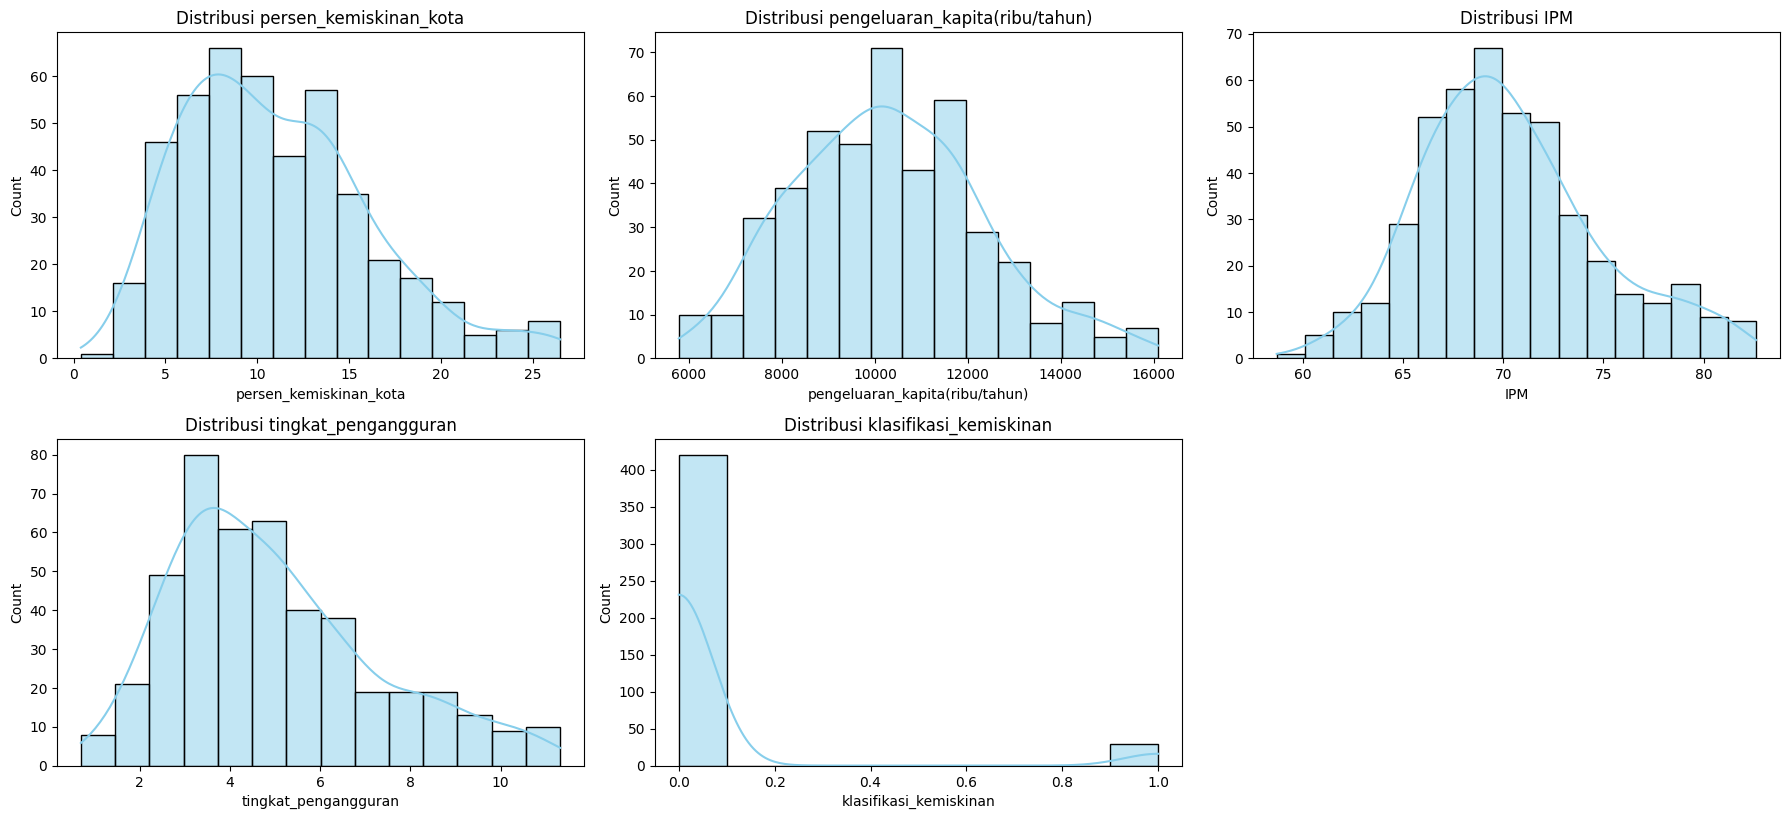

In [12]:
# Plot distribusi histogram untuk semua fitur numerik
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(18, 16))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

* Distribusi persen_kemiskinan_kota: Distribusi ini terlihat sedikit miring ke kanan (positively skewed). Ini mengindikasikan bahwa sebagian besar kota memiliki persentase kemiskinan yang relatif rendah, namun ada beberapa kota dengan persentase kemiskinan yang cukup tinggi yang menarik ekor distribusi ke kanan.

* Distribusi pengeluaran_kapita(ribu/tahun): Distribusi pengeluaran per kapita ini tampak mendekati distribusi normal atau sedikit miring ke kiri (negatively skewed). Ini menunjukkan bahwa sebagian besar populasi memiliki tingkat pengeluaran yang berada di sekitar nilai tengah, dengan beberapa orang memiliki tingkat pengeluaran yang lebih rendah.

* Distribusi IPM: Indeks Pembangunan Manusia (IPM) menunjukkan distribusi yang cenderung simetris atau mendekati normal. Ini menandakan bahwa sebagian besar wilayah memiliki tingkat pembangunan manusia yang serupa, dengan variasi yang tidak terlalu ekstrem.

* Distribusi tingkat_pengangguran: Distribusi tingkat pengangguran juga terlihat miring ke kanan (positively skewed). Ini berarti sebagian besar wilayah memiliki tingkat pengangguran yang relatif rendah, tetapi ada beberapa wilayah dengan tingkat pengangguran yang lebih tinggi yang menyebabkan ekor distribusi memanjang ke kanan.

* Distribusi klasifikasi_kemiskinan: Terlihat bahwa sebagian besar individu terklasifikasi sebagai tidak miskin (nilai 0), dengan sedikit yang terklasifikasi miskin (nilai 1).

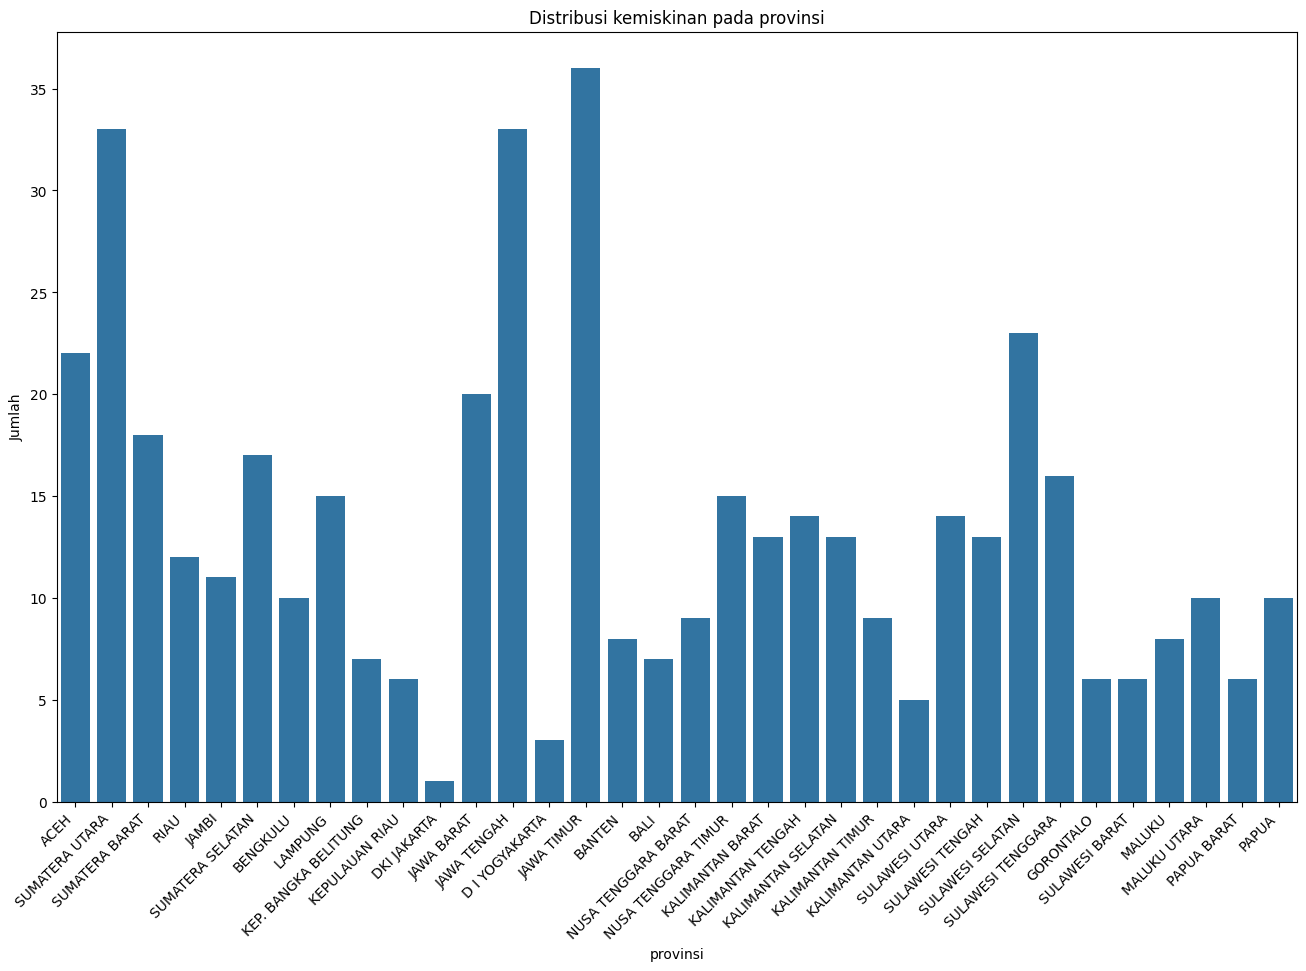

In [13]:
# Distribusi data pada kolom provinsi
plt.figure(figsize=(16, 10))
sns.countplot(x=df['provinsi'],  data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi kemiskinan pada provinsi')
plt.ylabel('Jumlah')
plt.show()

Distribusi data pada kolom provinsi :
*   Data dengan sedikit kontribusi ada di provinsi DKI Jakarta
*   Kontibusi data paling banyak ada di provinsi Jawa Timur




In [14]:
# Banyaknya nama kabupaten/kota yang ada didalam data
df['kab/kota'].nunique()

449

Data mencakup 449 kabupaten/kota, visualisasi grafiknya tidak saya sertakan karna grafik yang terlalu banyak sulit untuk mata kita meng-interpretasikan/memahami nya

## MultiVariate

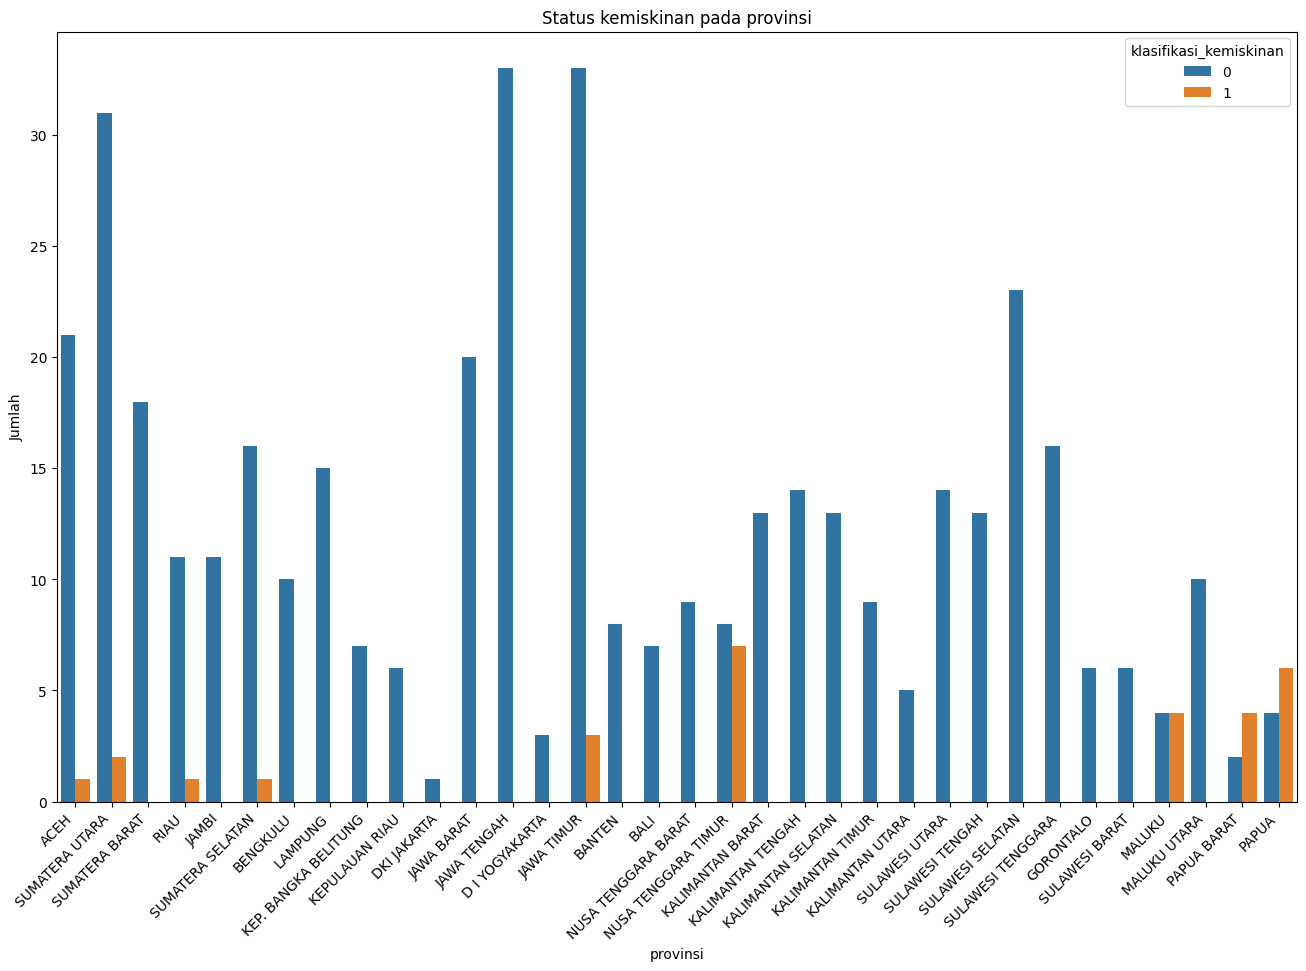

In [15]:
# data kemiskinan pada kolom provinsi
plt.figure(figsize=(16, 10))
sns.countplot(x=df['provinsi'], hue=df['klasifikasi_kemiskinan'],  data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Status kemiskinan pada provinsi')
plt.ylabel('Jumlah')
plt.show()

* Variasi Pola Kemiskinan Antar Provinsi: Pola distribusi antara kategori "0" dan "1" sangat bervariasi antar provinsi. Ada provinsi di mana jumlah yang tidak miskin jauh lebih banyak dari yang miskin, ada yang perbedaannya tidak terlalu besar, dan bahkan ada beberapa provinsi (meskipun terlihat sedikit) di mana jumlah yang diklasifikasikan sebagai miskin hampir sebanding atau bahkan lebih banyak dari yang tidak miskin.

* Insight : Beberapa provinsi terlihat memiliki batang kategori "0" yang jauh lebih tinggi daripada batang kategori "1", mengindikasikan proporsi "kemiskinan" yang relatif rendah.

* Contoh Provinsi Spesifik:

  1. Aceh: Terlihat memiliki jumlah kategori 0 yang lebih tinggi dari kategori 1.
  2. Papua: Menarik untuk diperhatikan bahwa di Papua, jumlah kategori 1 (miskin) terlihat lebih tinggi dibandingkan kategori 0 (tidak miskin).
  3. Nusa tenggara timur & Maluku: memiliki jumlah kategori 0 (tidak miskin) dan kategori 1 (miskin) yang hampir sama

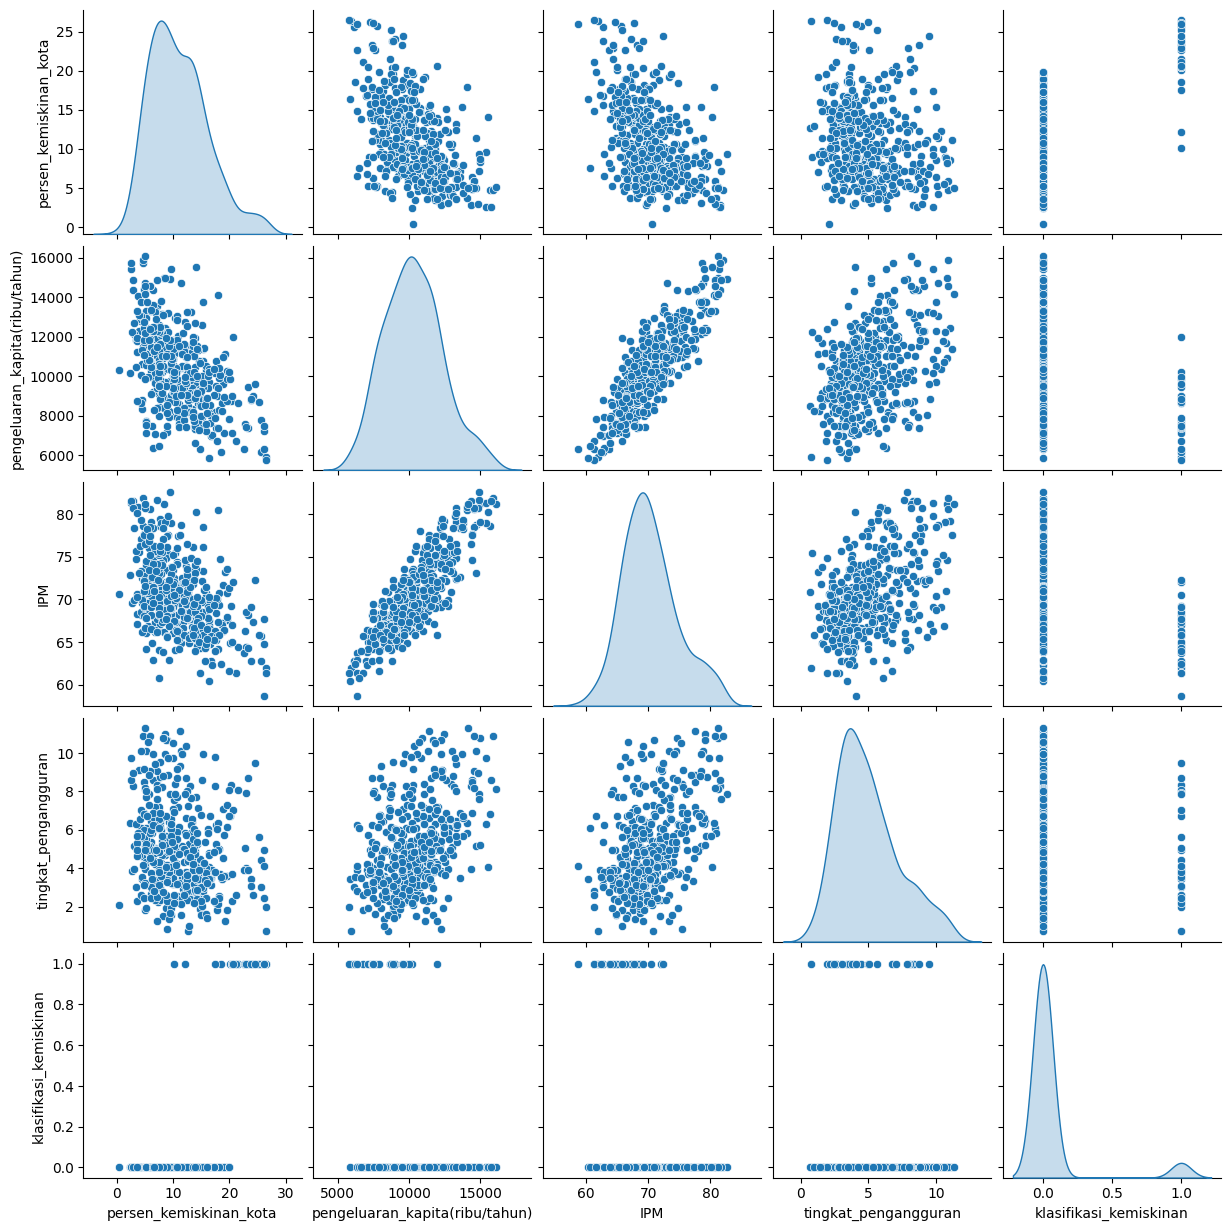

In [16]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

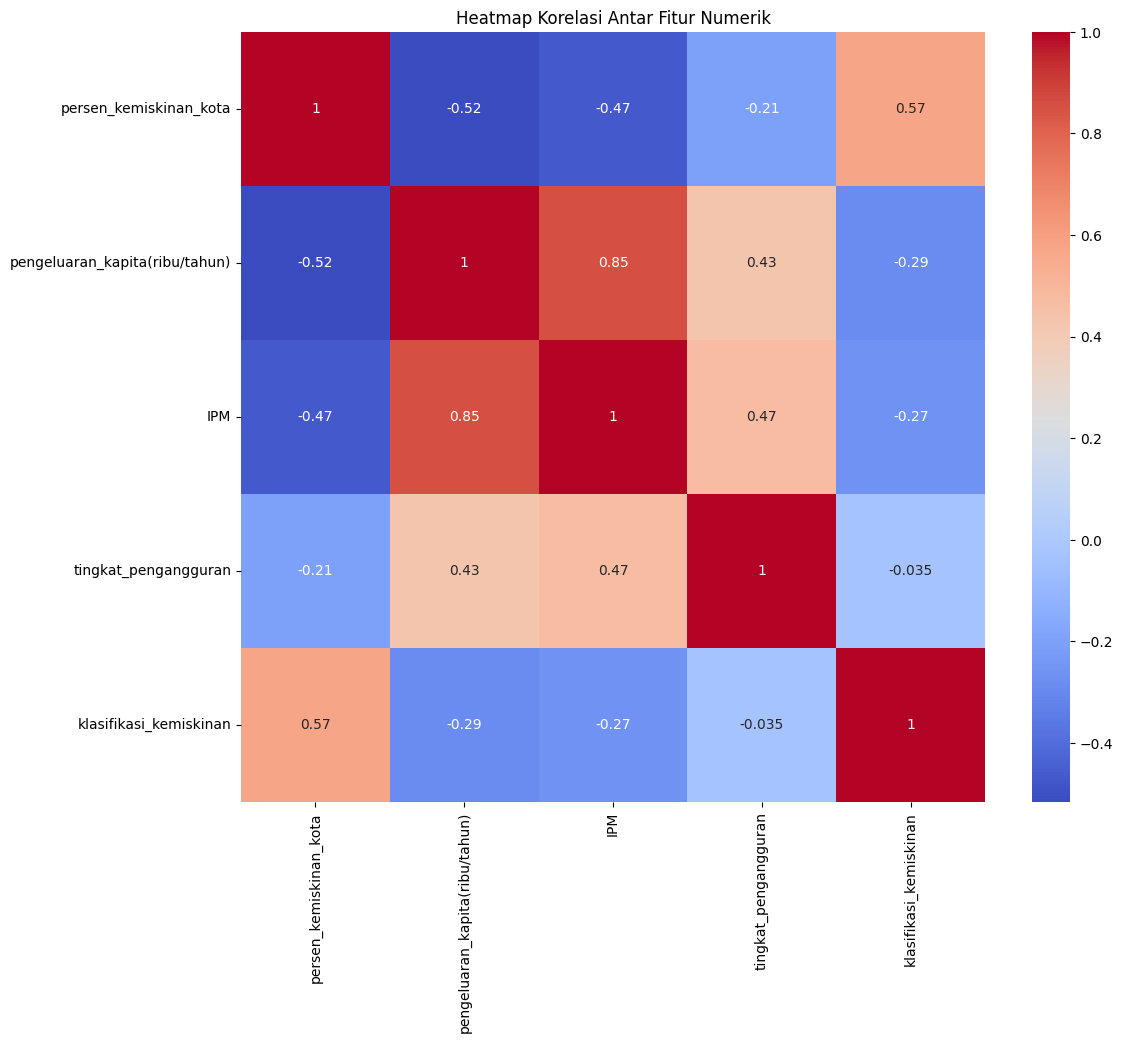

In [17]:
# Heatmap korelasi fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

Heatmap ini menunjukkan hubungan linear antar fitur numerik dalam dataset, termasuk terhadap target klasifikasi_kemiskinan. Nilai korelasi berkisar antara -1 sampai 1:

*   1 =  hubungan positif sempurna

* -1 = hubungan negatif sempurna

*  0 = tidak ada hubungan linear

| Pasangan Fitur                                          | Korelasi   | Interpretasi                                                                                                                                                         |
| :------------------------------------------------------ | :--------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **persen\_kemiskinan\_kota & klasifikasi\_kemiskinan**  | **+0.57**  | Cukup kuat positif. Artinya semakin tinggi persentase kemiskinan di kota, kemungkinan masuk ke klasifikasi miskin juga meningkat.                                    |
| **pengeluaran\_per\_kapita & IPM**                      | **+0.85**  | Sangat kuat positif. Semakin tinggi pengeluaran per kapita, biasanya IPM (Indeks Pembangunan Manusia) juga ikut tinggi. Masuk akal karena IPM terkait kesejahteraan. |
| **pengeluaran\_per\_kapita & klasifikasi\_kemiskinan**  | **-0.29**  | Lemah negatif. Semakin tinggi pengeluaran per kapita, peluang masuk klasifikasi miskin sedikit menurun.                                                              |
| **IPM & klasifikasi\_kemiskinan**                       | **-0.27**  | Lemah negatif. Semakin tinggi IPM, peluang masuk klasifikasi miskin juga cenderung lebih rendah.                                                                     |
| **tingkat\_pengangguran & klasifikasi\_kemiskinan**     | **-0.035** | Sangat lemah negatif. Tidak signifikan. Artinya tingkat pengangguran hampir tidak punya pengaruh langsung terhadap klasifikasi kemiskinan di data ini.               |
| **persen\_kemiskinan\_kota & pengeluaran\_per\_kapita** | **-0.52**  | Cukup kuat negatif. Semakin banyak orang miskin di kota, pengeluaran per kapitanya cenderung lebih rendah.                                                           |


# Data Preparation

In [18]:
# One hot encoding provinsi
df = pd.get_dummies(df, columns=['provinsi'])

Melakukan teknik One-hot encoding pada kolom provinsi

In [19]:
# Menghapus kolom provinsi dan kab/kota
df.drop(columns=['kab/kota'], inplace=True)
df.columns

Index(['persen_kemiskinan_kota', 'pengeluaran_kapita(ribu/tahun)', 'IPM',
       'tingkat_pengangguran', 'klasifikasi_kemiskinan', 'provinsi_ACEH',
       'provinsi_BALI', 'provinsi_BANTEN', 'provinsi_BENGKULU',
       'provinsi_D I YOGYAKARTA', 'provinsi_DKI JAKARTA', 'provinsi_GORONTALO',
       'provinsi_JAMBI', 'provinsi_JAWA BARAT', 'provinsi_JAWA TENGAH',
       'provinsi_JAWA TIMUR', 'provinsi_KALIMANTAN BARAT',
       'provinsi_KALIMANTAN SELATAN', 'provinsi_KALIMANTAN TENGAH',
       'provinsi_KALIMANTAN TIMUR', 'provinsi_KALIMANTAN UTARA',
       'provinsi_KEP. BANGKA BELITUNG', 'provinsi_KEPULAUAN RIAU',
       'provinsi_LAMPUNG', 'provinsi_MALUKU', 'provinsi_MALUKU UTARA',
       'provinsi_NUSA TENGGARA BARAT', 'provinsi_NUSA TENGGARA TIMUR',
       'provinsi_PAPUA', 'provinsi_PAPUA BARAT', 'provinsi_RIAU',
       'provinsi_SULAWESI BARAT', 'provinsi_SULAWESI SELATAN',
       'provinsi_SULAWESI TENGAH', 'provinsi_SULAWESI TENGGARA',
       'provinsi_SULAWESI UTARA', 'provin

Menghapus kolom kab/kota karna ingin merepresentasikan kemiskinan secara provinsi

In [20]:
# Pisahkan kolom target klasifikasi
X = df.drop(columns=['klasifikasi_kemiskinan'])
y = df['klasifikasi_kemiskinan']

# Split data train dan test dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Melakukan teknik split data yaitu train dan test dengan rasio 80:20

In [21]:
# Normalisasi menggunakan standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Melakukan normalisasi dengan menggunakan metode standard scaler agar data yang digunakan tidak memiliki penyimpangan yang besar.


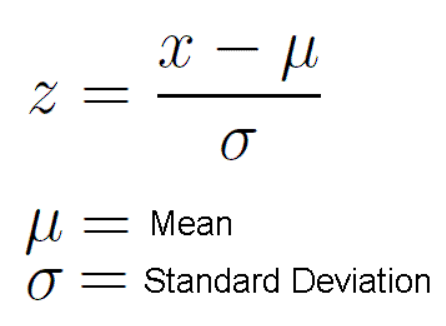

Metode ini bekerja dengan cara menghitung rata-rata dan standar deviasi dari data, kemudian membagi setiap nilai data dengan standar deviasi tersebut.

In [22]:
# Oversampling SMOTE agar data target balance
# Cek distribusi sebelum SMOTE
print("Distribusi sebelum SMOTE:", Counter(y_train))

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Cek distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_smote))

Distribusi sebelum SMOTE: Counter({0: 336, 1: 23})
Distribusi setelah SMOTE: Counter({0: 336, 1: 336})


Untuk penanganan imbalance class saya menggunakan teknik Oversampling SMOTE pada data train saya.

Oversampling SMOTE yaitu kondisi di mana jumlah sampel pada satu kelas (kelas minoritas) jauh lebih sedikit dibandingkan dengan kelas lainnya (kelas mayoritas). Tujuan SMOTE adalah untuk menyeimbangkan distribusi kelas dengan cara menciptakan sampel sintetis baru untuk kelas minoritas, bukan hanya menggandakan sampel yang sudah ada.

Cara kerja Oversampling SMOTE itu seperti ini:

1. Cari Kelereng Biru yang Mirip: Untuk setiap kelereng biru yang kamu punya, SMOTE akan mencari beberapa kelereng biru lain yang paling mirip dengannya (misalnya, ukurannya hampir sama).

2. Bikin Kelereng Biru "Bayangan": SMOTE tidak menggandakan kelereng biru yang sudah ada. Tapi, ia akan membuat kelereng biru "bayangan" yang posisinya ada di antara kelereng biru asli dan kelereng biru mirip yang ditemukannya. Anggap saja seperti mencampur warna antara dua kelereng biru untuk mendapatkan warna biru yang sedikit berbeda.

3. Tambah Kelereng Bayangan: Kelereng biru "bayangan" ini adalah data baru yang mirip dengan data yang sudah ada, tapi tidak persis sama. Dengan menambahkan kelereng biru "bayangan" ini, jumlah kelereng biru jadi lebih banyak dan lebih seimbang dengan kelereng merah.

# Model Development

In [23]:
# Siapkan dataframe untuk menyimpan performa model
models = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score'],
                      columns=['KNN', 'DecisionTree', 'RandomForest'], dtype='float')

## K-Nearest Neighbour

In [24]:
# train model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

y_train_pred_knn = knn.predict(X_train_smote)
y_test_pred_knn  = knn.predict(X_test_scaled)

# Performa model pada test set
accuracy_knn  = accuracy_score(y_test, y_test_pred_knn)
precison_knn = precision_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
f1_score_knn  = f1_score(y_test, y_test_pred_knn, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'KNN']   = accuracy_knn
models.loc['precision', 'KNN'] = precison_knn
models.loc['recall', 'KNN']    = recall_knn
models.loc['f1_score', 'KNN'] = f1_score_knn

Model pertama yang saya pilih yaitu algoritma KNN yang mengklasifikasikan atau memprediksi label dari sebuah data baru berdasarkan label dari K data terdekatnya dalam ruang fitur. Kedekatan biasanya diukur menggunakan jarak (misalnya, Euclidean).

Cara Kerja:

1. Tentukan K: Pilih jumlah tetangga terdekat (K) yang ingin dipertimbangkan. Nilai K adalah bilangan bulat positif (disini saya memilih 5).

2. Hitung Jarak: Hitung jarak antara data baru yang ingin diklasifikasikan/diprediksi dengan semua data yang ada dalam dataset pelatihan.

3. Cari K Tetangga Terdekat: Pilih K data dalam dataset pelatihan yang memiliki jarak terkecil dengan data baru.

4. Klasifikasi: Hitung jumlah kelas yang paling sering muncul di antara K tetangga terdekat.
Label kelas yang paling sering muncul inilah yang diprediksi menjadi label untuk data baru.


## Decision Tree

In [25]:
# train model Decision Tree
dtree = DecisionTreeClassifier(random_state=42, max_depth=3)
dtree.fit(X_train_smote, y_train_smote)

y_train_pred_dt = dtree.predict(X_train_smote)
y_test_pred_dt  = dtree.predict(X_test_scaled)

# Performa model pada test set
accuracy_dt  = accuracy_score(y_test, y_test_pred_dt)
precison_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
f1_score_dt  = f1_score(y_test, y_test_pred_dt, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'DecisionTree']   = accuracy_dt
models.loc['precision', 'DecisionTree'] = precison_dt
models.loc['recall', 'DecisionTree']    = recall_dt
models.loc['f1_score', 'DecisionTree'] = f1_score_dt

Selanjutnya saya menggunakan Decision tree yaitu algoritma supervised learning yang digunakan untuk klasifikasi dan regresi. Cara kerjanya adalah dengan membuat struktur seperti pohon di mana setiap node internal merepresentasikan sebuah fitur (atau atribut), setiap cabang merepresentasikan sebuah keputusan atau aturan pengujian, dan setiap leaf node (node daun) merepresentasikan hasil akhir (kelas atau nilai prediksi).

Tujuan utama dari Decision Tree adalah untuk membuat serangkaian aturan keputusan sederhana ("jika-maka") yang dapat digunakan untuk memprediksi kelas atau nilai dari data baru.



## Random Forest

In [26]:
# train model Random Forest
rf = RandomForestClassifier(random_state=42, max_depth=3)
rf.fit(X_train_smote, y_train_smote)

y_train_pred_rf = rf.predict(X_train_smote)
y_test_pred_rf  = rf.predict(X_test_scaled)

# Performa model pada test set
accuracy_rf  = accuracy_score(y_test, y_test_pred_rf)
precison_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_score_rf  = f1_score(y_test, y_test_pred_rf, average='weighted')

# Simpan ke dataframe
models.loc['accuracy', 'RandomForest']   = accuracy_rf
models.loc['precision', 'RandomForest'] = precison_rf
models.loc['recall', 'RandomForest']    = recall_rf
models.loc['f1_score', 'RandomForest'] = f1_score_rf

dan terakhir saya menggunakan algoritma Random Forest yaitu algoritma supervised learning yang termasuk dalam kategori ensemble learning. Artinya, alih-alih menggunakan satu model, Random Forest membangun banyak Decision Tree (pohon keputusan) secara independen dan kemudian menggabungkan prediksi dari semua pohon tersebut untuk mendapatkan prediksi akhir. Ide utamanya adalah bahwa "kerumunan" pohon yang lemah dapat menjadi "hutan" yang kuat dan akurat.

# Evaluasi Model

In [27]:
print(models)

                KNN  DecisionTree  RandomForest
accuracy   0.922222      0.977778      0.966667
precision  0.454545      0.750000      0.666667
recall     0.833333      1.000000      1.000000
f1_score   0.932467      0.979231      0.969697


1. Decision Tree adalah model terbaik untuk mengklasifikasikan kemiskinan. Model ini mencapai akurasi tertinggi (0.978) dan yang paling penting, recall sempurna (1.00). Artinya, Decision Tree mampu mengidentifikasi semua individu yang benar-benar miskin, memastikan tidak ada yang terlewat dari program bantuan. Meskipun precision-nya 0.75 menunjukkan ada beberapa "salah sasaran" yang disebabkan kurangnya kelas minoritas dalam dataset, **kemampuan untuk tidak melewatkan individu miskin menjadikannya pilihan paling relevan**.

2. Random Forest juga sangat baik dengan recall sempurna (1.00), namun precision-nya sedikit lebih rendah (0.667) dibanding Decision Tree.

3. Sebaliknya, KNN menunjukkan performa paling buruk. Dengan precision hanya 0.455 dan recall 0.833, KNN akan menghasilkan banyak "salah sasaran" dan gagal mengidentifikasi sebagian individu miskin, menjadikannya tidak cocok untuk kasus ini.

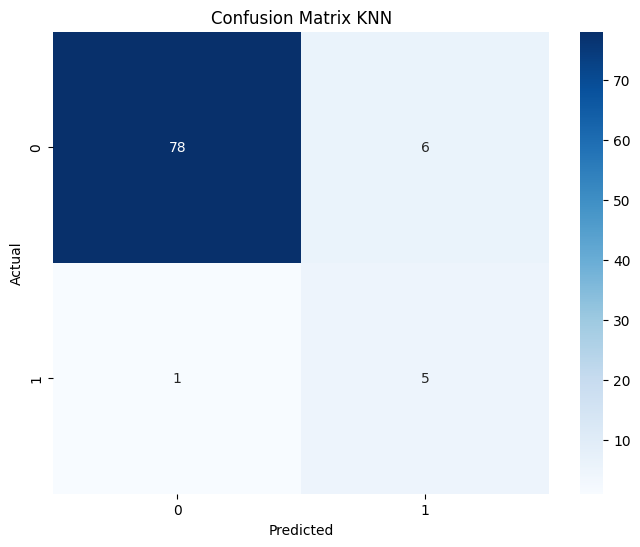

In [28]:
# Confusion matrix KNN
cm_knn = confusion_matrix(y_test, y_test_pred_knn)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

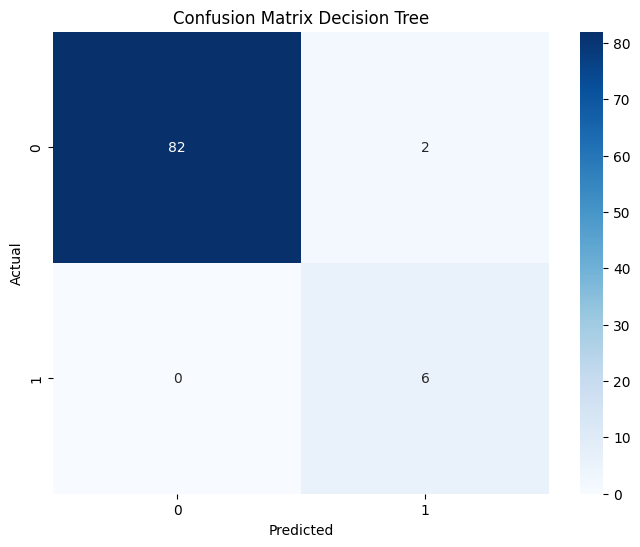

In [29]:
# Confussion matrix Decision tree
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

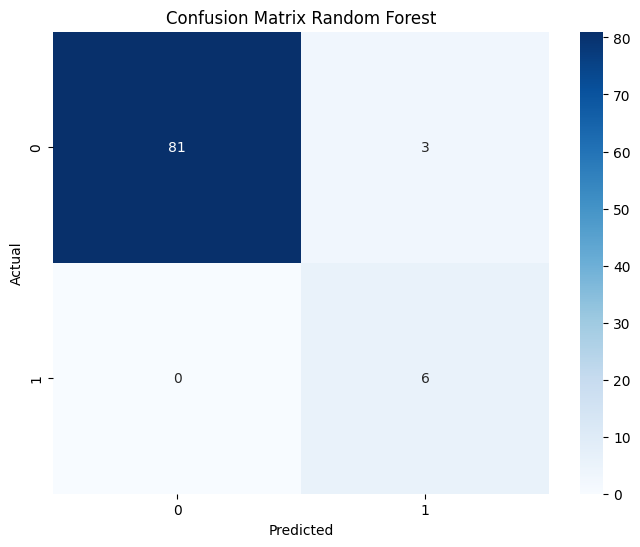

In [30]:
# Confussion matrix Random forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

Dari tiga algoritma yang diuji:

1. **Decision Tree adalah model paling efektif**.

  Mencapai akurasi 0.978 dan yang terpenting, recall sempurna 1.00. Ini berarti Decision Tree berhasil mengidentifikasi 100% individu yang benar-benar miskin (tidak ada yang terlewatkan), sangat krusial untuk program bantuan.
  Memiliki jumlah "salah sasaran" (false positives = 2) terendah di antara model lain.
2. Random Forest juga sangat baik dengan recall 1.00, tetapi sedikit lebih banyak "salah sasaran" (false positives = 3).

3. KNN adalah model paling lemah.

  Memiliki 1 individu miskin yang terlewatkan (false negative = 1) dan jumlah "salah sasaran" tertinggi (false positives = 6), membuatnya tidak cocok untuk tujuan ini.
  Kesimpulan: Decision Tree adalah pilihan terbaik karena kemampuannya untuk mengidentifikasi semua individu miskin, yang merupakan prioritas utama dalam penanganan kemiskinan.